# Análise exploratória da folha de pagamento da Empresa de Tecnologia da Informação e Comunicação do Município de São Paulo - PRODAM

## Base de dados referente a 01/2019

A PRODAM/SP é uma empresa de economia mista vinculada à Prefeitura de São Paulo, que atua no desenvolvimento de soluções em tecnologia da informação e comunicação para a prefeitura, de modo a maximizar a aplicação e a gestão dos recursos em setores como educação, saúde, planejamento e finanças. Desenvolve sistemas para a automação da gestão pública, geoprocessamento, aplicações para as áreas de educação, saúde, esporte e cultura, entre outras.

A análise a seguir visa produzir informações relevantes a partir dos dados provenientes da folha de pagamento da PRODAM/SP no mês de janeiro de 2019. Para tanto, a análise será segmentada em seções com questionamentos relevantes para melhor entendimento da estrutura deste orgão.

A base de dados utilizada foi obtida através do programa de Dados Abertos da Prefeitura de São Paulo, disponível neste [link](http://dados.prefeitura.sp.gov.br/dataset/folha-de-pagamento-prodam).

Caio Ignatz Martins

São Paulo, 15 de abril de 2019

## Imports iniciais

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from matplotlib.dates import date2num

import squarify

## Imports do R

In [26]:
#Utilização da biblioteca genderBR para previsão de genêro a partir do primeiro nome
#Disponível em https://fmeireles.com/blog/rstats/genderbr-predizer-sexo/
from rpy2.robjects.packages import importr
gnd = importr('genderBR')

## Leitura do arquivo

In [62]:
#alterar caminho do arquivo, criar uma pasta única para notebook e arquivo
df = pd.read_excel('Downloads/folhaprodam2019.xlsx')

## 1. Introdução

Demonstração do resumo dos dados mais relevantes, visando motivar a exploração posterior

In [4]:
df.head()

,EMPRESA,MES,ANO,NOME,CARGO,LOTACAO,ADMISSAO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS,VÍNCULO
0,PRODAM,Janeiro,2019,JEFERSON GUILHERME DE SOUZA,ANALISTA DE TIC,GDU-NMI-NÚCLEO MOBILIDADE E SERVIÇOS - I,1977-03-23,1962,20353.85,3067.33,5908.50,0,CLT: contrato por tempo indeterminado
1,PRODAM,Janeiro,2019,JOSE MARIA HAENNI INFANTE,ANALISTA DE TIC,GDM-NAF NUCLEO DE ARQ.FERRAMENTAS E CONF,2000-08-01,1961,13823.63,2083.22,2692.43,0,CLT: contrato por tempo indeterminado
2,PRODAM,Janeiro,2019,ADRIANA FERRAZ,ANALISTA DE TIC,GIO-NC - NÚCLEO DE CONTRATOS,2013-10-23,1979,3772.52,568.52,1596.78,0,CLT: contrato por tempo indeterminado
3,PRODAM,Janeiro,2019,ADRIANA NOBUCO URIU MATSUMURA,ANALISTA DE TIC,GDU-NMS NÚCLEO MOBIL.SERVIÇOS – SISTEMAS,2018-08-01,1976,8429.12,1270.27,2869.49,0,CLT: contrato por tempo indeterminado
4,PRODAM,Janeiro,2019,ADLER ZELLIS,ANALISTA DE TIC,GDF/NDF-NUCLEO DECLAR FISCAIS MOBILIARI,2013-09-16,1979,6894.42,1038.99,3139.72,0,CLT: contrato por tempo indeterminado


In [5]:
print('Número de funcionários ativos 01/2019: {}'.format(len(df) - len(df.loc[df['VÍNCULO'] == 'Desligado'])))

Número de funcionários ativos 01/2019: 976


### 1.1 Cargo mais comum

In [6]:
df['CARGO'].describe()

count                 990
unique                 51
top       ANALISTA DE TIC
freq                  589
Name: CARGO, dtype: object

#### Analista de TIC

De acordo com o site [PCI Concursos](https://www.pciconcursos.com.br/concurso/prodam-empresa-de-tec-da-informacao-e-comunicacao-sp-777-vagas) esta carreira é dividida em, pelo menos, 40 especializações e estas se distribuem em três faixas de senioridade. As especializações se diferenciam por aréa ou tecnologia. Já os diferentes níveis de senioridade exigem experiência prévia comprovada de 1 a 5 anos. Para as vacâncias relacionadas a essa posição, exige-se formação em Análise de Sistemas, Matemática, Ciência da Computação, Administração de Empresas ou Pós-graduação nas áreas especificadas. É possível observar que, no edital divulgado, os salários iniciais de Analista de TIC variam de 2.427,00 a 4.959,00

### 1.2 Vencimentos

In [7]:
df['VENCIMENTOS'].describe().round()

count      990.0
mean     11773.0
std       7969.0
min          0.0
25%       6223.0
50%      10357.0
75%      15929.0
max      43462.0
Name: VENCIMENTOS, dtype: float64

### Desvio padrão dos vencimentos

O valor da variabilidade da amostra de vencimentos, R$ 7969,00, é indício de especialização em cargos, conforme atestado na seção anterior, e, também, de planos de progressão de carreira.

### 1.3 Idade

In [8]:
df['NASCIMENTO'].describe().round()

count     990.0
mean     1971.0
std        13.0
min      1936.0
25%      1961.0
50%      1970.0
75%      1981.0
max      2000.0
Name: NASCIMENTO, dtype: float64

### Funcionário médio tem 48 anos de idade

Observa-se que a PRODAM conserva colaboradores de variadas faixas etárias em seu quadro, sendo que seu funcionário ativo mais longevo tem 83 anos, enquanto que os mais novos partem dos 18 anos. Ademais, de acordo com [matéria](https://www1.folha.uol.com.br/cotidiano/2018/07/com-populacao-cada-vez-mais-velha-brasil-atinge-208-milhoes-de-pessoas.shtml) da Folha de São Paulo, a média de idade da população brasileira é 32,6 anos.



## 2. Como se dá a divisão dos funcionários nas lotações da PRODAM?

In [9]:
#Análise da quantidade de funcionários por lotação
#Há 128 possibilidades de lotação df['LOTACAO'].unique()
funcionarios_lot = )
funcionarios_lot.columns = ['Quantidade']
funcionarios_lot.index.names = ['Lotacao']
#Lotações com maior quantidade de funcionários
top_func = funcionarios_lot.head(10)

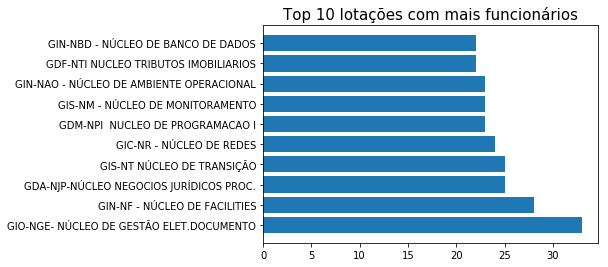

In [10]:
bars = top_func.index
y_pos = np.arange(len(bars))
plt.barh(y_pos, top_func['Quantidade'])
plt.yticks(y_pos, bars)
plt.title('Top 10 lotações com mais funcionários', fontsize=15)
plt.show()

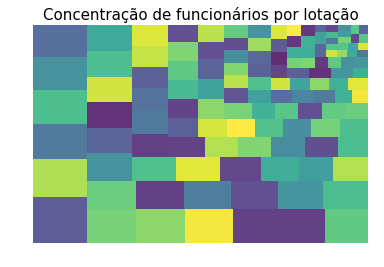

In [11]:
func_perc = funcionarios_lot.divide(funcionarios_lot.sum(axis=0), axis=1).multiply(100)
squarify.plot(sizes=func_perc['Quantidade'], alpha=.85)
plt.axis('off')
plt.title('Concentração de funcionários por lotação', fontsize=15)
plt.show()

In [64]:
df['GENERO'] = df['NOME'].apply(lambda nome: gnd.get_gender(nome)[0])

In [121]:
div_gen = pd.DataFrame(df['GENERO'].value_counts())
div_gen.columns = ['Quantidade']
div_gen.index = ['Masculino', 'Feminino', 'Não identificado']

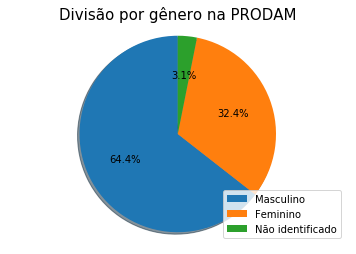

In [123]:
fig1, ax1 = plt.subplots()
ax1.pie(div_gen['Quantidade'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Divisão por gênero na PRODAM', fontsize=15)
plt.legend(div_gen.index, loc=4)
plt.show()

## 3. Como se caracterizam as relações etárias na PRODAM? 

In [179]:
pd.options.mode.chained_assignment = None 
top_cargos = pd.DataFrame(df['CARGO'].value_counts()).head(5).index
df1 = df[df['CARGO'].isin(top_cargos)]
cargo_idade = df1[['CARGO', 'NASCIMENTO']]
cargo_idade['NASCIMENTO'] = cargo_idade['NASCIMENTO'].apply(lambda x: 2019 - x)

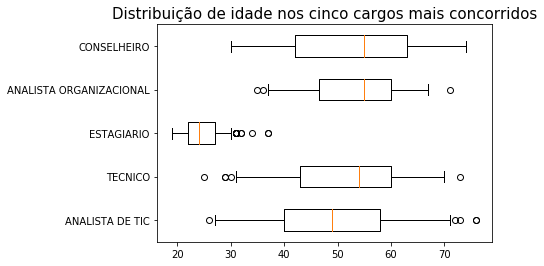

In [176]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribuição de idade nos cinco cargos mais concorridos', fontsize=15)
ax1.boxplot([cargo_idade.loc[cargo_idade['CARGO'] == cargo]['NASCIMENTO'] for cargo in top_cargos],
           vert=False, whis=0.75)
plt.yticks([1, 2, 3, 4, 5], [cargo for cargo in top_cargos])
plt.show()

## 4 . Qual é o perfil de colaborador com remuneração mais elevada?

In [301]:
venc = df[['CARGO', 'VENCIMENTOS', 'VÍNCULO', 'GENERO']]

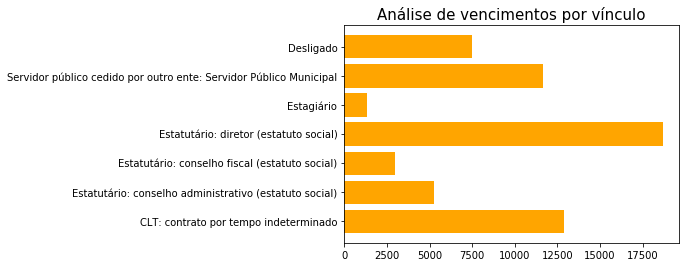

In [306]:
values = [int(venc.loc[venc['VÍNCULO'] == vinc].describe().round().iloc[[1]]['VENCIMENTOS']) for vinc in venc['VÍNCULO'].unique()]
labels = [label for label in venc['VÍNCULO'].unique()]

bars = labels
y_pos = np.arange(len(bars))
plt.barh(y_pos, values, color='orange')
plt.yticks(y_pos, bars)
plt.title('Análise de vencimentos por vínculo', fontsize=15)
plt.show()

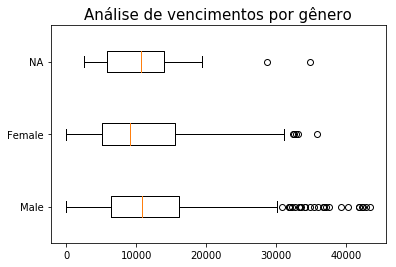

In [307]:
fig1, ax1 = plt.subplots()
ax1.set_title('Análise de vencimentos por gênero', fontsize=15)
ax1.boxplot([venc.loc[venc['GENERO'] == gen]['VENCIMENTOS'] for gen in venc['GENERO'].unique()],
           vert=False)
plt.yticks([1, 2, 3], [gen for gen in venc['GENERO'].unique()])
plt.show()

In [348]:
wage_equality = []
for cargo in df['CARGO'].unique():
    if float(venc.loc[(venc['CARGO'] == cargo) & 
                      (venc['GENERO'] == 'Female')].describe().round().iloc[[1]]['VENCIMENTOS']) >= float(venc.loc[(venc['CARGO'] == cargo) & (venc['GENERO'] == 'Male')].describe().round().iloc[[1]]['VENCIMENTOS']):
        wage_equality.append(cargo)

In [346]:
print('Cargos em que as mulheres ganham mais ou o mesmo do que os homens: {}'.format(wage_equality))

Cargos em que as mulheres ganham mais ou o mesmo do que os homens: ['TECNICO', 'ADVOGADO', 'COORDENADOR DE NÚCLEO IV', 'ASSESSOR ESPECIAL III', 'COORDENADOR DE NÚCLEO III', 'ASSESSOR - I', 'GERENTE DEPARTAMENTO I', 'COORDENADOR DE PROCESSOS VII', 'COORDENADOR DE PROCESSOS VIII', 'GERENTE DEPARTAMENTO III', 'COORDENADOR DE PROCESSOS X', 'ASSESSOR DE DIRETORIA IX', 'ASSESSOR DIRETORIA X', 'GERENTE DEPARTAMENTO V']
